In [1]:
import numpy as np
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

# https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-22 14:29:02--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  46.6MB/s   in 1.5s   

2020-09-22 14:29:03 (46.6 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
dataset = pd.read_csv('Data-Collisions.csv')
dataset.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
dataset.shape

(194673, 38)

In [5]:
dataset.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [6]:
dataset[['SEVERITYDESC','SEVERITYCODE']].groupby(['SEVERITYDESC']).agg(['min','max'])

SEVERITYCODE    
                                        min max
SEVERITYDESC                                   
Injury Collision                          2   2
Property Damage Only Collision            1   1

In [7]:
dataset.drop(columns=['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL',  'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],inplace=True)

In [8]:
dataset['WEATHER']=dataset['WEATHER'].fillna(value='Unknown')
dataset['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      20172
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [9]:
dataset['ROADCOND']=dataset['ROADCOND'].fillna(value='Other')
dataset['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Other               5144
Ice                 1209
Snow/Slush          1004
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [10]:
dataset['LIGHTCOND']=dataset['LIGHTCOND'].fillna(value='Other')
dataset['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Other                         5405
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [11]:
dataset['WEATHER_NUM']=0
dataset.loc[dataset.WEATHER=='Clear','WEATHER_NUM']=4
dataset.loc[dataset.WEATHER=='Raining','WEATHER_NUM']=3
dataset.loc[dataset.WEATHER=='Overcast','WEATHER_NUM']=2
dataset.loc[dataset.WEATHER=='Unknown','WEATHER_NUM']=1
dataset.WEATHER_NUM.value_counts()

4    111135
3     33145
2     27714
1     20172
0      2507
Name: WEATHER_NUM, dtype: int64

In [12]:
dataset['ROADCOND_NUM']=1
dataset.loc[dataset.ROADCOND=='Dry','ROADCOND_NUM']=3
dataset.loc[dataset.ROADCOND=='Wet','ROADCOND_NUM']=2
dataset.loc[(dataset.ROADCOND=='Unknown')|(dataset.ROADCOND=='Other'),'ROADCOND_NUM']=0


dataset.ROADCOND_NUM.value_counts()

3    124510
2     47474
0     20222
1      2467
Name: ROADCOND_NUM, dtype: int64

In [13]:
dataset['LIGHTCOND_NUM']=0
dataset.loc[dataset.LIGHTCOND=='Daylight','LIGHTCOND_NUM']=5
dataset.loc[dataset.LIGHTCOND=='Dusk','LIGHTCOND_NUM']=4
dataset.loc[dataset.LIGHTCOND=='Dawn','LIGHTCOND_NUM']=3
dataset.loc[dataset.LIGHTCOND=='Dark - Street Lights On','LIGHTCOND_NUM']=2
dataset.loc[(dataset.LIGHTCOND=='Dark - No Street Lights')
            |(dataset.LIGHTCOND=='Dark - Street Lights Off')
            |(dataset.LIGHTCOND=='Dark - Unknown Lighting ')
            ,'LIGHTCOND_NUM']=1


dataset.LIGHTCOND_NUM.value_counts()

5    116137
2     48507
0     18889
4      5902
1      2736
3      2502
Name: LIGHTCOND_NUM, dtype: int64

In [14]:
dataset.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_NUM,ROADCOND_NUM,LIGHTCOND_NUM
0,2,Overcast,Wet,Daylight,2,2,5
1,1,Raining,Wet,Dark - Street Lights On,3,2,2
2,1,Overcast,Dry,Daylight,2,3,5
3,1,Clear,Dry,Daylight,4,3,5
4,2,Raining,Wet,Daylight,3,2,5


In [19]:
a=dataset.copy()
a['cnt']=1

In [21]:
a[['LIGHTCOND_NUM','SEVERITYCODE','cnt']].groupby(['ROADCOND_NUM','SEVERITYCODE']).agg('sum')

cnt
ROADCOND_NUM SEVERITYCODE       
0            1             18370
             2              1852
1            1              1950
             2               517
2            1             31719
             2             15755
3            1             84446
             2             40064

In [15]:
X=dataset[['WEATHER_NUM','ROADCOND_NUM','LIGHTCOND_NUM']].values
X[:5]

array([[2, 2, 5],
       [3, 2, 2],
       [2, 3, 5],
       [4, 3, 5],
       [3, 2, 5]])

In [15]:
y=dataset['SEVERITYCODE'].values
y[:5]

array([2, 1, 1, 1, 2])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 3) (155738,)
Test set: (38935, 3) (38935,)


# K nearest neighbor (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [19]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 1, 1, 1, 2])

In [20]:
y_test[0:5]

array([2, 1, 1, 2, 2])

In [21]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5431172867251409
Test set Accuracy:  0.5405932965198408


In [22]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.47702581, 0.54141518, 0.53242584, 0.5405933 , 0.53579042,
       0.54216001, 0.52764865, 0.54393219, 0.53301657])

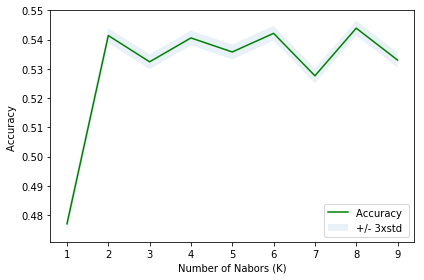

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [24]:
# Pick k=8
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [25]:
yhat = neigh.predict(X_test)
yhat[0:10]

array([2, 1, 1, 1, 2, 2, 1, 2, 2, 1])

In [26]:
y_test[0:10]

array([2, 1, 1, 2, 2, 1, 2, 2, 2, 1])

In [27]:
list_df=[0]*len(y_test)
neight_df=pd.DataFrame(list_df)
neight_df['ytest']=y_test
neight_df['yhat']=yhat

In [28]:
neight_df['result']=0
neight_df.loc[neight_df.ytest==neight_df.yhat,'result']=1

In [29]:
neight_df.result.value_counts()

1    21178
0    17757
Name: result, dtype: int64

In [30]:
# 21178/38935

In [31]:
# from sklearn import metrics
# print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.5439321946834468


In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.74      0.54      0.63     27425
           2       0.33      0.54      0.41     11510

   micro avg       0.54      0.54      0.54     38935
   macro avg       0.54      0.54      0.52     38935
weighted avg       0.62      0.54      0.56     38935

Confusion matrix, without normalization
[[14917 12508]
 [ 5249  6261]]


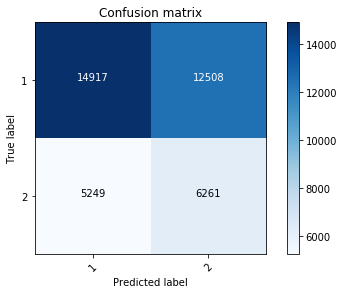

In [65]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2'],normalize= False,  title='Confusion matrix')

In [66]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5638186373014934

In [67]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.5439321946834468